In [ ]:


import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
print("All libraries have been imported")



All libraries have been imported


In [ ]:


df = pd.read_csv('TSLA.csv')
df.head(10)



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [ ]:
df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Adj Close  2416 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.9+ KB


In [ ]:


df['Date'] = pd.to_datetime(df['Date'])
df_chg= df.set_index(['Date'], drop=True)
df_chg.head()



,Adj Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


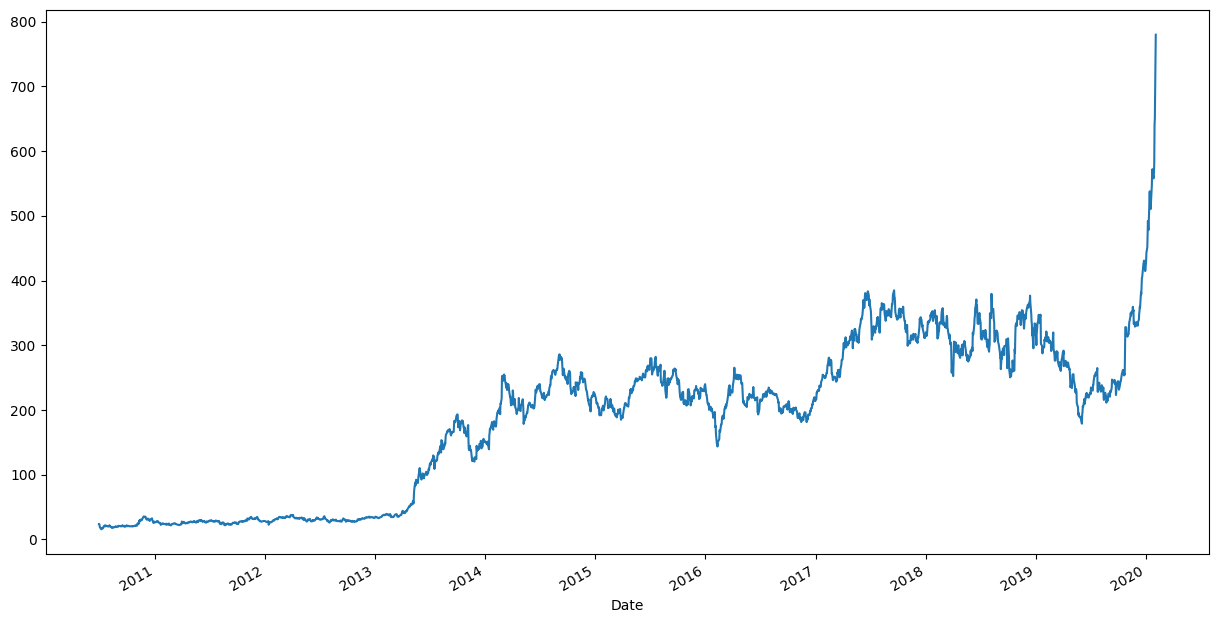

In [ ]:


plt.figure(figsize=(15,8))
df_chg['Adj Close'].plot();



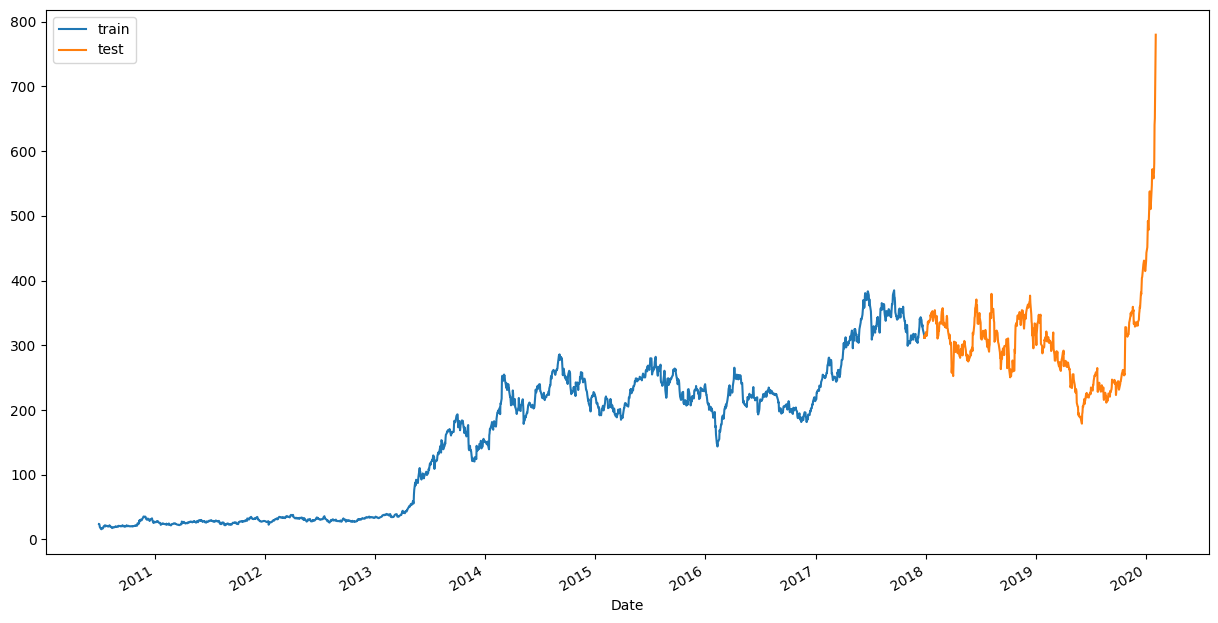

In [ ]:
split_date = pd.Timestamp('2017-12-27')
df1 = df_chg['Adj Close']
train = df1.loc[:split_date]
test = df1.loc[split_date:]
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [ ]:


print("We have", len(train), "train values")
print("We have", len(test), "test values")



We have 1889 train values
We have 528 test values


In [ ]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:1996:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[1995:2495:1]

In [ ]:


scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)



In [ ]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [ ]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
#nn_model.add(Dense(6, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0791
Epoch 2/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0030
Epoch 3/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0015
Epoch 4/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 5/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 6/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 7/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 8/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 9/100
1995/1995 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 10/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 11/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0010
Epoch 12/100
1995/1995 [==============================] - 3s 1ms/step - lo

In [ ]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

63/63 [==============================] - 0s 1ms/step
The R2 score on the Train set is:	0.987
The R2 score on the Test set is:	0.896


In [ ]:
from sklearn.metrics import mean_absolute_error
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)

print('NN: %f'%nn_test_mse)
mae = mean_absolute_error(y_test, y_pred_test_nn)

# Print the MAE
print("Mean Absolute Error (MAE):", mae)

420/420 [==============================] - 1s 1ms/step - loss: 0.0179
NN: 0.017949
Mean Absolute Error (MAE): 0.07662690390420508


In [ ]:
nn_y_pred_test = nn_model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


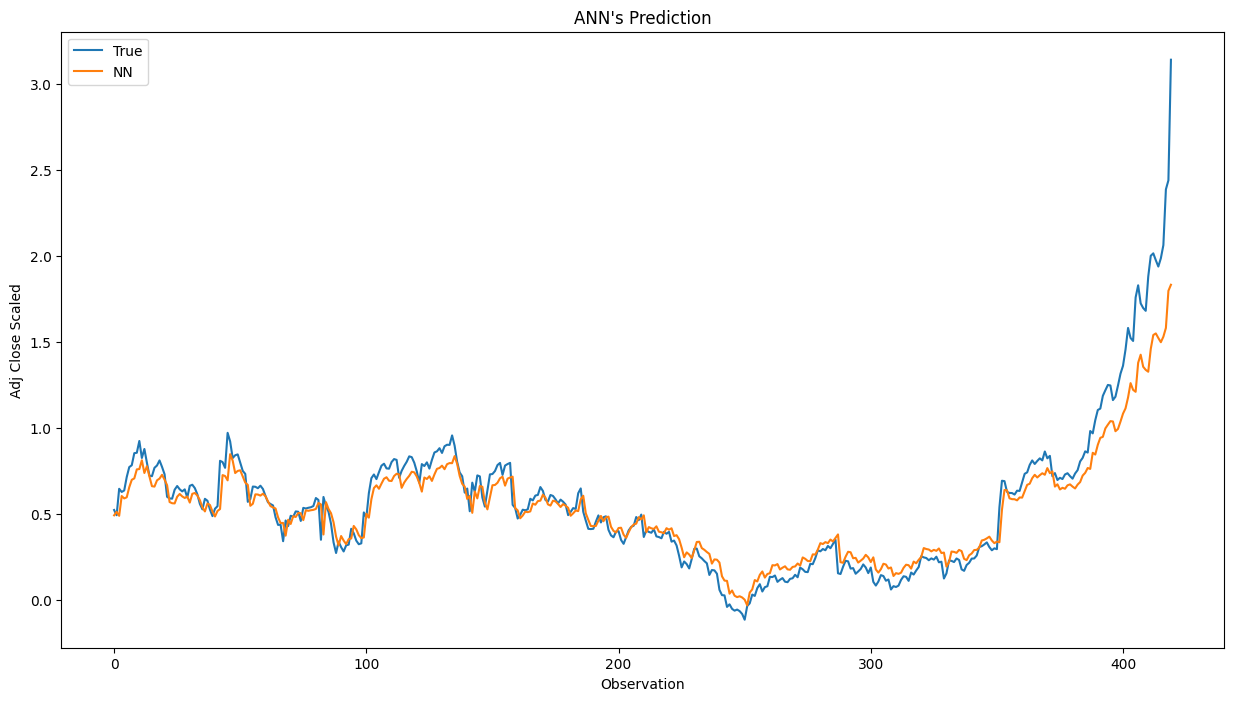

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();